# Documentação da Análise

Esta análise tem como objetivo explorar e processar os dados descritos no arquivo README.md deste repositório. A seguir, detalhamos os principais passos que serão realizados:

1. **Carregamento dos Dados**: Importaremos os dados brutos para o ambiente de análise, garantindo que estejam no formato adequado para processamento.

2. **Limpeza e Pré-processamento**: Realizaremos a limpeza dos dados, tratando valores ausentes, duplicados e inconsistências.

3. **Análise Exploratória**: Aplicaremos técnicas de análise exploratória para identificar padrões, tendências e possíveis insights nos dados.

4. **Visualização de Dados**: Geraremos gráficos e visualizações para facilitar a interpretação dos resultados.

5. **Modelagem**: Aplicaremos modelos estatísticos ou de machine learning para aprofundar a análise.

6. **Conclusões e Próximos Passos**: Documentaremos as principais conclusões obtidas e sugeriremos próximos passos com base nos resultados.

## Sobre o Estudo e a Metodologia RDD

O estudo utiliza a metodologia de **Regression Discontinuity Design (RDD)**, uma abordagem estatística amplamente empregada para avaliar causalidade em situações onde há um ponto de corte que determina a atribuição de um tratamento. Essa metodologia explora a descontinuidade no comportamento dos dados ao redor do ponto de corte para inferir o impacto causal do tratamento. 

O RDD é particularmente útil em contextos onde experimentos randomizados não são viáveis, mas há uma regra clara que define quem recebe o tratamento. A análise será conduzida com base nessa metodologia, garantindo rigor estatístico e alinhamento com os objetivos do projeto.

Certifique-se de seguir as instruções e objetivos descritos no README.md para alinhar a análise com os requisitos do projeto.

### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from plotnine import *
import patchworklib as pwk
import warnings
import os
warnings.filterwarnings('ignore')

No module named 'distutils'


<Figure size 100x100 with 0 Axes>

### Importando dataset

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.path.dirname("__file__"), "../"))
DATA_DIR = os.path.join(BASE_DIR, 'data')

data = pd.read_csv(os.path.join(DATA_DIR, 'carpenter_dobkin.csv'), usecols = lambda x: x != 'Unnamed: 0', encoding = "Latin1")
data

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
0,19.068493,92.825401,91.706146,16.617590,16.738131,76.207817,74.968010,0.639138,0.794344,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236
1,19.150684,95.100739,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633888,3.236511,3.470022,8.655786,8.530174
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233238,74.950226,0.866443,0.877835,15.219254,16.262882,11.715812,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681
3,19.315069,88.427757,92.202141,16.101770,17.272680,72.325981,74.929466,0.867308,0.915115,16.742825,16.261148,11.275010,11.596655,32.278957,34.256302,3.280689,3.514980,8.258285,8.785728
4,19.397261,88.704941,92.342918,17.363520,17.442156,71.341415,74.900757,1.019163,0.949407,14.947726,16.265511,10.984314,11.598189,32.650967,34.062588,3.548198,3.538755,8.417533,8.899288
5,19.479452,90.191788,92.471344,17.872105,17.607254,72.319679,74.864090,1.171322,0.980701,15.642815,16.275990,12.166634,11.599731,32.721443,33.865582,3.211689,3.563399,7.972546,9.003332
6,19.561644,96.220306,92.587387,16.414942,17.767965,79.805367,74.819420,0.869916,1.008988,16.263653,16.292604,12.405763,11.601281,36.385197,33.665272,3.857890,3.588913,10.287705,9.097831
7,19.643835,89.615555,92.691017,15.977087,17.924273,73.638466,74.766747,1.097951,1.034261,15.825645,16.315371,10.979514,11.602839,34.187935,33.461647,3.483156,3.615300,8.670031,9.182756
8,19.726027,93.381699,92.782196,17.433271,18.076166,75.948425,74.706024,1.174851,1.056508,16.789000,16.344309,11.900103,11.604405,31.910467,33.254696,4.055130,3.642563,10.763150,9.258080
9,19.808220,90.857956,92.860870,18.285400,18.223631,72.572556,74.637245,0.948413,1.075722,16.616194,16.379436,11.570638,11.605980,30.576832,33.044415,3.566033,3.670704,9.863494,9.323772


In [4]:
data.columns

Index(['agecell', 'all', 'allfitted', 'internal', 'internalfitted', 'external',
       'externalfitted', 'alcohol', 'alcoholfitted', 'homicide',
       'homicidefitted', 'suicide', 'suicidefitted', 'mva', 'mvafitted',
       'drugs', 'drugsfitted', 'externalother', 'externalotherfitted'],
      dtype='object')

Com o dataset importado, vamos veriicar a presença de valores nulos e corrigi-los se for o caso

In [5]:
print(data.isnull().sum())
print(data.shape)

agecell                0
all                    2
allfitted              0
internal               2
internalfitted         0
external               2
externalfitted         0
alcohol                2
alcoholfitted          0
homicide               2
homicidefitted         0
suicide                2
suicidefitted          0
mva                    2
mvafitted              0
drugs                  2
drugsfitted            0
externalother          2
externalotherfitted    0
dtype: int64
(50, 19)


Existe valore nulos. Aplicando correções

In [6]:
data = data.dropna()
print(data.isnull().sum())
print(data.dtypes) #verify data types
data.describe() #verify summary statistics

agecell                0
all                    0
allfitted              0
internal               0
internalfitted         0
external               0
externalfitted         0
alcohol                0
alcoholfitted          0
homicide               0
homicidefitted         0
suicide                0
suicidefitted          0
mva                    0
mvafitted              0
drugs                  0
drugsfitted            0
externalother          0
externalotherfitted    0
dtype: int64
agecell                float64
all                    float64
allfitted              float64
internal               float64
internalfitted         float64
external               float64
externalfitted         float64
alcohol                float64
alcoholfitted          float64
homicide               float64
homicidefitted         float64
suicide                float64
suicidefitted          float64
mva                    float64
mvafitted              float64
drugs                  float64
drugsfitted     

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,21.000000,95.672724,95.710748,20.285291,20.270427,75.387433,75.440321,1.257337,1.261252,16.912068,16.920716,12.351980,12.352000,31.622984,31.654261,4.249660,4.252506,9.598514,9.602549
std,1.150685,3.831062,3.167136,2.253907,2.032591,2.986008,2.100497,0.350312,0.250143,0.729982,0.433013,1.063468,0.749959,2.384977,1.975321,0.615579,0.531661,0.748369,0.459061
min,19.068493,88.427757,91.706146,15.977087,16.738131,71.341415,73.231209,0.639138,0.794344,14.947726,16.261148,10.889364,11.592100,26.855064,27.868282,3.202071,3.448835,7.972546,8.388236
25%,20.034246,92.785929,93.011339,18.597654,18.605792,73.042023,74.074011,0.996152,1.074608,16.611996,16.508697,11.609375,11.610351,30.116604,30.183348,3.754717,3.752728,9.148840,9.368922
50%,21.000000,95.686272,95.178303,20.288866,20.513326,74.813251,74.736385,1.211941,1.247127,16.985353,16.980202,12.201629,12.251134,31.641135,31.732578,4.314018,4.315965,9.560833,9.690198
75%,21.965754,98.025751,97.687096,21.976349,21.718088,77.242350,75.890547,1.470119,1.444973,17.288067,17.210073,12.818972,13.020548,33.096747,33.301501,4.756345,4.693542,10.122497,9.929438
max,22.931507,105.268349,102.589081,24.372910,24.043783,83.330986,81.484543,2.519309,1.788588,18.410973,17.721460,14.831890,13.520511,36.385197,34.817780,5.564563,5.130238,11.482519,10.321973


É possível ver várias colunas, conforme visualização acima. Mas para esta análise precisamos apenas de algumas. 
Vamos então selecionar as colunas de interesse.

Além disso, vamos também transformar a coluna de idade para retirar quem tem 21 anos, criar uma coluna de dummies (`over_21`), onde quem tem mais que 21 anos recebe a chave zero, do contrário, chave 1, e mais uma coluna que contem outras causas externas (`other_external_causes`) que simplesmente retira da coluna `external` as colunas de homicíio, suicídio e mva.

In [7]:
data = (data[['agecell', "external", "homicide", "suicide", "mva", "all", "internal", "alcohol", "drugs"]])
data = data.assign(age = lambda x: x['agecell'] - 21, # idade de corte
                   over_21 = lambda x: (x['agecell'] >= 21).astype(int), # dummy para idade maior ou igual que 21
                   other_external_causes = lambda x: x['external'] - x['homicide'] - x['suicide'] - x['mva']) # outras causas externas



data.head()

,agecell,external,homicide,suicide,mva,all,internal,alcohol,drugs,age,over_21,other_external_causes
0,19.068493,76.207817,16.316818,11.203714,35.829327,92.825401,16.617590,0.639138,3.872425,-1.931507,0,12.857958
1,19.150684,76.773056,16.859964,12.193368,35.639256,95.100739,18.327684,0.677409,3.236511,-1.849316,0,12.080468
2,19.232876,73.233238,15.219254,11.715812,34.205650,92.144295,18.911053,0.866443,3.202071,-1.767124,0,12.092523
3,19.315069,72.325981,16.742825,11.275010,32.278957,88.427757,16.101770,0.867308,3.280689,-1.684931,0,12.029189
4,19.397261,71.341415,14.947726,10.984314,32.650967,88.704941,17.363520,1.019163,3.548198,-1.602739,0,12.758409


### Data Visualization


Agora vamos visualizar nossos dados para ter uma análise mais visual a respeito de correlações entre as variáveis.

Um diagrama abaixo resume a função que utilizamos para reeordenar o dataframe num _long format_ antes de aplicar a visualização de 

![Gráfico de Análise](../image/pd_melt_data_long_design.png)

In [8]:
# Visualização longa do dataset (transformação de matriz)
data_long = (pd.melt(data, id_vars= ['agecell', 'age', 'over_21'],
                     var_name= 'causes',
                     value_name= 'index')).reset_index(drop= True)

data_long

,agecell,age,over_21,causes,index
0,19.068493,-1.931507,0,external,76.207817
1,19.150684,-1.849316,0,external,76.773056
2,19.232876,-1.767124,0,external,73.233238
3,19.315069,-1.684931,0,external,72.325981
4,19.397261,-1.602739,0,external,71.341415
...,...,...,...,...,...
427,22.602739,1.602739,1,other_external_causes,15.318857
428,22.684931,1.684931,1,other_external_causes,16.029898
429,22.767124,1.767124,1,other_external_causes,15.737327
430,22.849316,1.849316,1,other_external_causes,15.483999


Interessante notar que na coluna `age` está normalizada com média 21. Isto é, valores acima de 21 serão maiores do que zero, enquanto que valores abaixo de 21 serão menores do que zero.

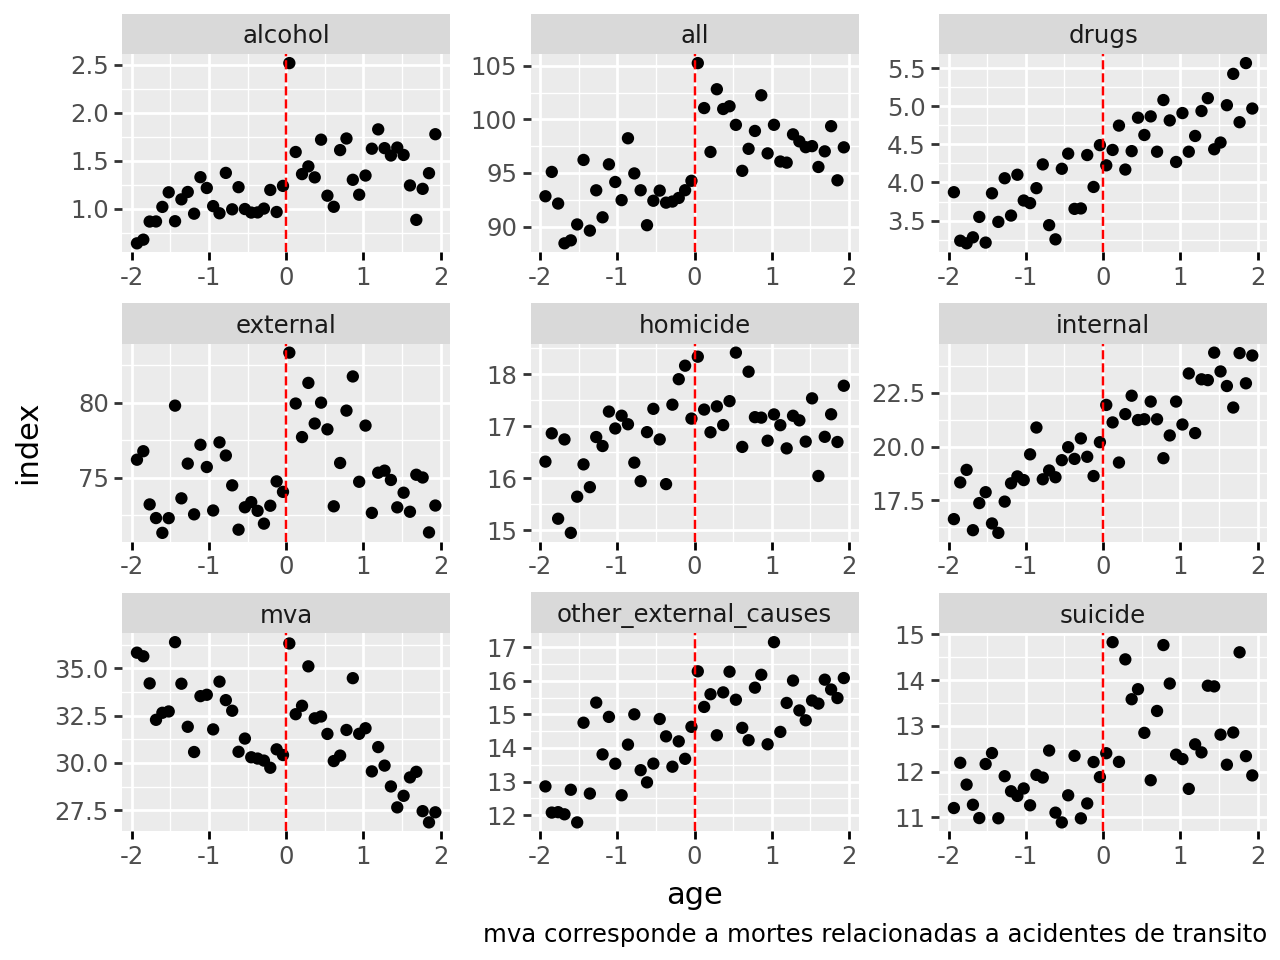

In [9]:
# Criar o gráfico usando plotnine
(ggplot(data_long, aes(x='age', y='index')) +
 geom_point() +
 geom_vline(xintercept = 0, linetype = 'dashed', color = 'red') +
 facet_wrap('~causes', scales='free') +
 labs(caption="mva corresponde a mortes relacionadas a acidentes de transito"))



É possível verificar então que visualmente há uma descontinuidade nas mortes causadas por alcoolismo ( `alcohol`), todas as causas (`all`), relacionadas à acidentes de transito (`mva`) e suicídio (`suicide`).

Portanto, realizaremos a regressão descontínua para esses quatro casos, conforme o diagrama mostra.

![Gráfico de Análise](../image/rdd_specifications.png)


### Regressão Descontínua



In [10]:
rdd_df = data.assign(thereshold = (data['age'] > 0).astype(int))

model = smf.wls("all ~  age*thereshold", rdd_df).fit()

print(model.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         93.6184      0.932    100.399      0.000      91.739      95.498
age                0.8270      0.819      1.010      0.318      -0.823       2.477
thereshold         7.6627      1.319      5.811      0.000       5.005      10.320
age:thereshold    -3.6034      1.158     -3.111      0.003      -5.937      -1.269


#### Como interpretar os coeficientes?

- O coeficiente de interação ajusta a inclinação da relação entre `age` e `all` dependendo do valor de `threshold`.

- Antes do ponto de corte (`threshold = 0`), o efeito da idade é dado apenas pelo coeficiente de `age` (0.8270).

- Após o ponto de corte (`threshold = 1`), o efeito da idade é ajustado para:

$$
\text{Efeito de age} = 0.8270 + (-3.6034) = -2.7764
$$

Isso significa que, após o ponto de corte, a relação entre idade e a variável dependente se torna negativa.

Para expressar nosso coeficiente de interesse, o `threshold`, em termos percentuais, usamos a fórmula:

$$
\left[ \frac{(\beta_0 + \beta_2)}{\beta_2} - 1 \right] \times 100
$$

temos:


In [11]:
print(f'''então que o efeito médio após o ponto de corte
é de um aumento de {(((model.params[0] + model.params[2]) / model.params[0]) - 1) * 100:.2f}% nas mortes de forma geral
causadas pelo alcoolismo.

Visualizando no gráfico temos''')

então que o efeito médio após o ponto de corte
é de um aumento de 8.19% nas mortes de forma geral
causadas pelo alcoolismo.

Visualizando no gráfico temos


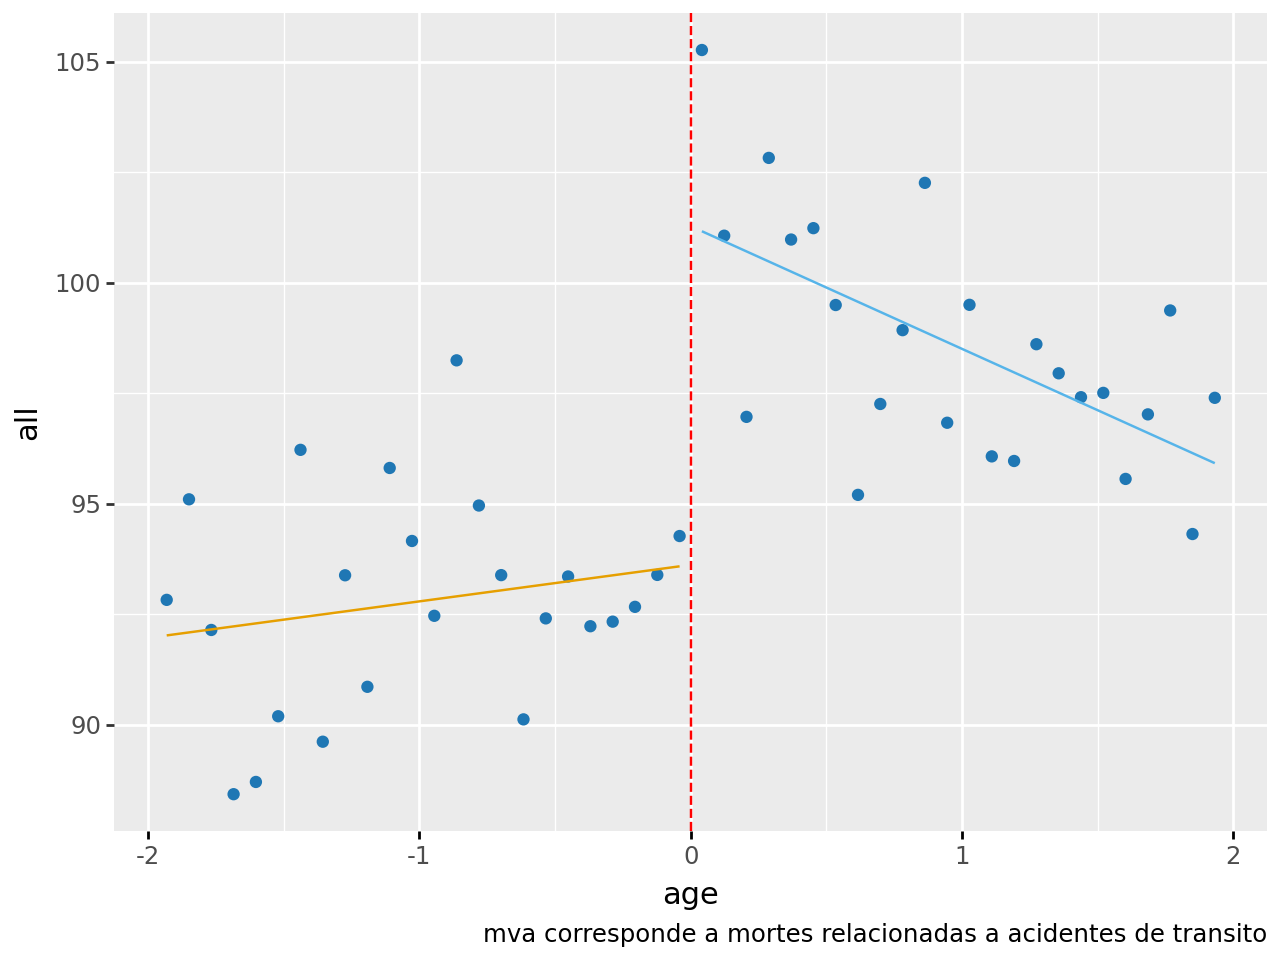

In [12]:
rdd_df = rdd_df.assign(predictions_all = model.fittedvalues,
                       over_21 = rdd_df.over_21.astype(str))

(ggplot(rdd_df, aes(x='age', y='all', color='over_21')) +
    geom_point(color = 'C0') +
    geom_vline(xintercept = 0, linetype = 'dashed', color = 'red') +
    geom_line(aes(y='predictions_all', group = "over_21", color = "over_21")) +
    labs(caption="mva corresponde a mortes relacionadas a acidentes de transito") +
    theme(legend_position = "none") +
    scale_color_manual(values=["#E69F00", "#56B4E9"]))

Para as demais causas de morte, conforme informamos no diagrama, que serão

1. causadas por acidentes de trânsito;
2. causadas por suicídio.
3. por todas as causas

In [13]:
# Criar e ajustar os modelos


models = {}
ate_pct_values = []

for cause in ["all", "mva", "suicide"]:
    formula = f"{cause} ~ age*thereshold"
    model = smf.wls(formula, rdd_df).fit()
    models[cause] = model
    ate_pct = (((model.params[0] + model.params[2]) / model.params[0]) - 1) * 100
    ate_pct_values.append(ate_pct)
    print(f"ATE for {cause}: {ate_pct:.2f}%")

ATE for all: 8.19%
ATE for mva: 15.15%
ATE for suicide: 15.39%


Desta forma, conseguimos avaliar o efeito médio pós-corte em cada especificação diferente.

Para todas as causas, o consumo de álcool aumenta as chances de morte aumentam 8,19%. Dado a linha de corte, o consumo de álcool aumenta a chance de morte em 15,15% para mortes causadas por acidente de trânsito e 15,39% as chances de suicídio.

Agora é hora de enxergarmos visualmente estes pontos.

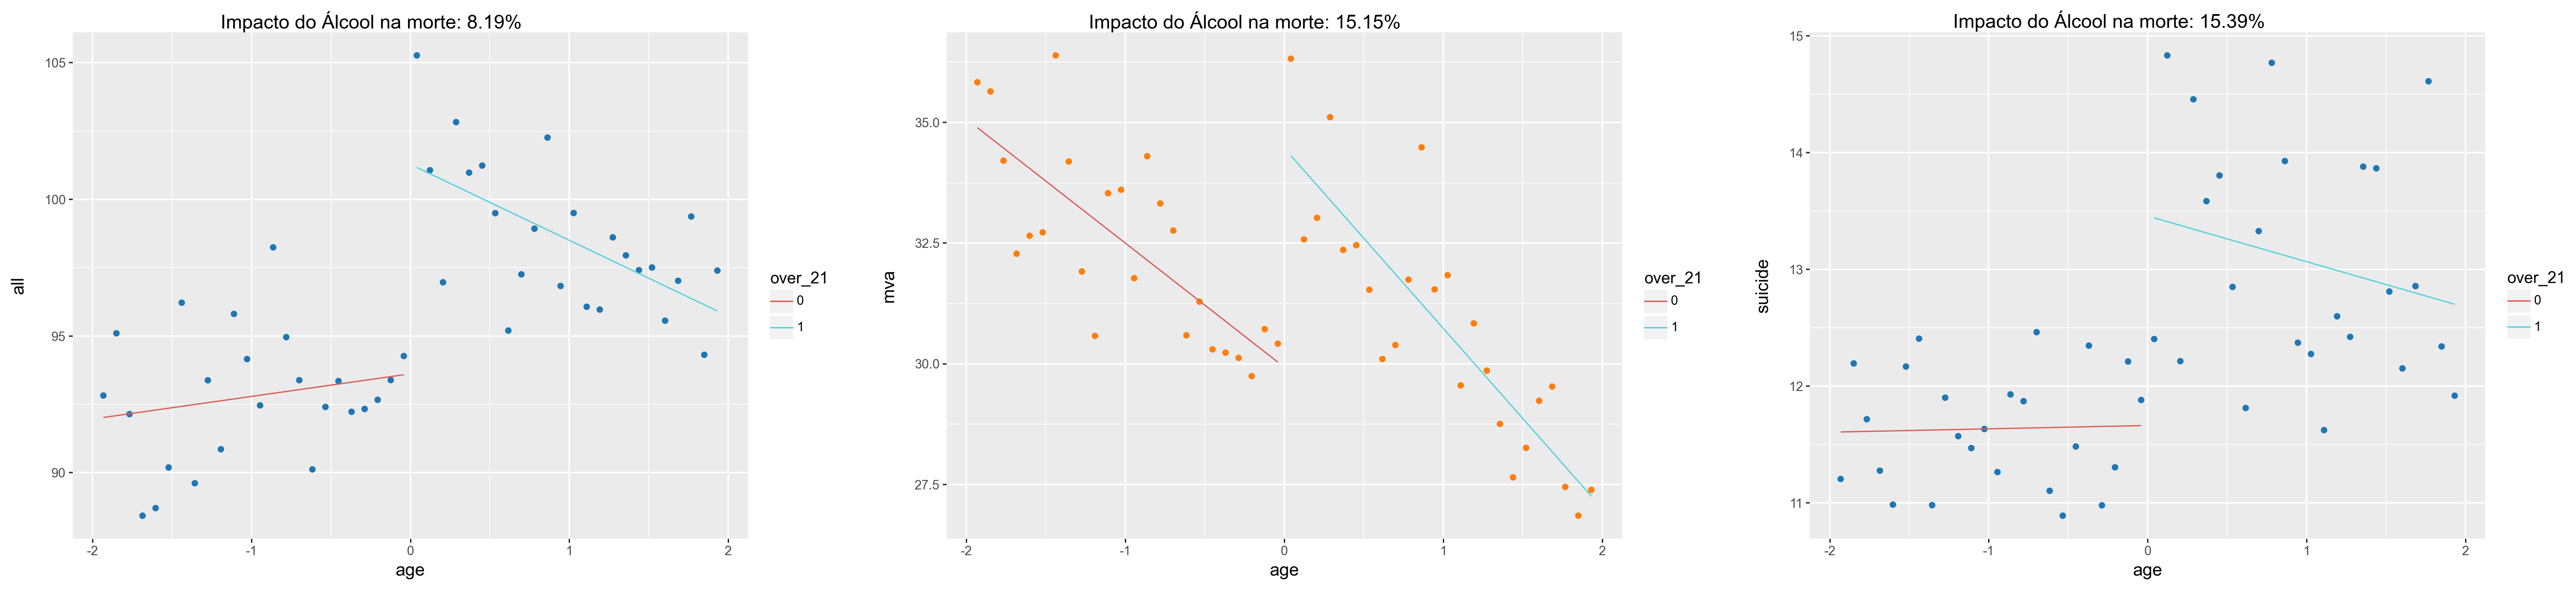

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [14]:
for cause in ["all", "mva", "suicide"]:
    rdd_df[cause + "_fitted"] = models[cause].fittedvalues
    rdd_df[cause + "_over_21"] = rdd_df[cause + "_fitted"] * rdd_df["thereshold"]
    
    
    # Criar o gráfico usando plotnine
plot_all = (ggplot(rdd_df, aes(x='age', y='all')) +
            geom_point(color = 'C0') +
            geom_line(aes(x = 'age', y = 'all_fitted', group = "over_21", color = 'over_21')) +
            #theme_minimal() + 
            labs(title = f"Impacto do Álcool na morte: {np.round(ate_pct_values[0], 2)}%")
            )
plot_all = pwk.load_ggplot(plot_all)


plot_mva = (ggplot(rdd_df, aes(x='age', y='mva')) +
            geom_point(color = 'C1') +
            geom_line(aes(x = 'age', y = 'mva_fitted', group = "over_21", color = 'over_21')) +
            #theme_minimal() + 
            labs(title = f"Impacto do Álcool na morte: {np.round(ate_pct_values[1], 2)}%")
            )
plot_mva = pwk.load_ggplot(plot_mva)

plot_suicide = (ggplot(rdd_df, aes(x = 'age', y = 'suicide'))+
                geom_point(color = 'C0')+
                geom_line(aes(x = 'age', y = 'suicide_fitted', group = 'over_21', color = 'over_21')) +
                #theme_minimal() + 
                labs(title = f"Impacto do Álcool na morte: {np.round(ate_pct_values[2], 2)}%")
            )
plot_suicide = pwk.load_ggplot(plot_suicide)

(plot_all + plot_mva + plot_suicide)

###  Forma funcional do modelo

Até então, assumimos que a relação entre a variável de atribuição e a variável de interesse é linear. Entretanto, Isso pode fazer com que a regressão se ajuste muito aos dados distantes da linha de corte e pouco aos próximos dela. Isso pode fazer como que a estimação da regressão linear encontre um efeito viesado em relação ao impacto real.



Uma forma de solucionar esse problema é dar pesos maiores para os pontos que estão próximos da linha de corte. Há diversas maneiras de realizar esse procedimento, seja através introduzir polinômios na regressão ou definir uma largura de banda próxima da linha de corte. Um método popular para o segundo caso é o _triangular kernel_.

$$
K(R, c, h) = 1{\{|R - c| \leq h\}} \cdot \left(1 - \frac{|R - c|}{h}\right)
$$
 

A primeira parte deste núcleo é uma função indicadora de quão próximos estamos da linha de corte. Quão próximo? Isso é determinado por um parâmetro de largura de banda. A segunda parte deste núcleo é uma função de ponderação. À medida que nos afastamos da linha de corte, os pesos ficam cada vez menores. Esses pesos são divididos pela largura de banda. Se a largura de banda for grande, os pesos diminuem a uma taxa mais lenta. Se a largura de banda for pequena, os pesos rapidamente se aproximam de zero.

Vamos definir como exemplo uma largura de banda de tamanho 1, significando que vamos considerar apenas dados de pessoas que não são mais velha que 22 anos e mais novos que 20 anos.

In [15]:
def kernel(R, c, h):
    """
    Função que calcula o valor do kernel para um determinado ponto R, centro c e largura h.

    Parâmetros:
    R (array-like): Um array de valores onde o kernel será aplicado.
    c (float): O centro do kernel.
    h (float): A largura do kernel.

    Retorna:
    numpy.ndarray: Um array de valores representando os pesos do kernel aplicado a cada ponto em R.
    """

    # Calcula o indicador de pontos dentro do intervalo de largura h
    indicator = (np.abs(R - c) <= h).astype(float)

    # Calcula os pesos do kernel para cada ponto
    weights = indicator * (1 - np.abs(R - c) / h)

    return weights

In [16]:
# Realiza o ajuste da regressão com o Kernel
model_kernel = smf.wls("all~age*thereshold", rdd_df,
                weights = kernel(rdd_df["age"], c = 0, h = 1)).fit()

# Sumário da regressão
print(model_kernel.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         93.2002      0.731    127.429      0.000      91.726      94.674
age                0.4109      1.789      0.230      0.819      -3.196       4.017
thereshold         9.7004      1.034      9.378      0.000       7.616      11.785
age:thereshold    -7.1759      2.531     -2.835      0.007     -12.276      -2.076


Conforme visualizado, ao ponderarmos pelos pesos usando a metodologia do _Tringular Kernel_ os impacto do consumo de álcool aumenta as mortes de causas gerais em mais de 2% (de 7.6627 pata 9.7004).


#### Data Visualization

Visualmente, após esse tratamento, temos

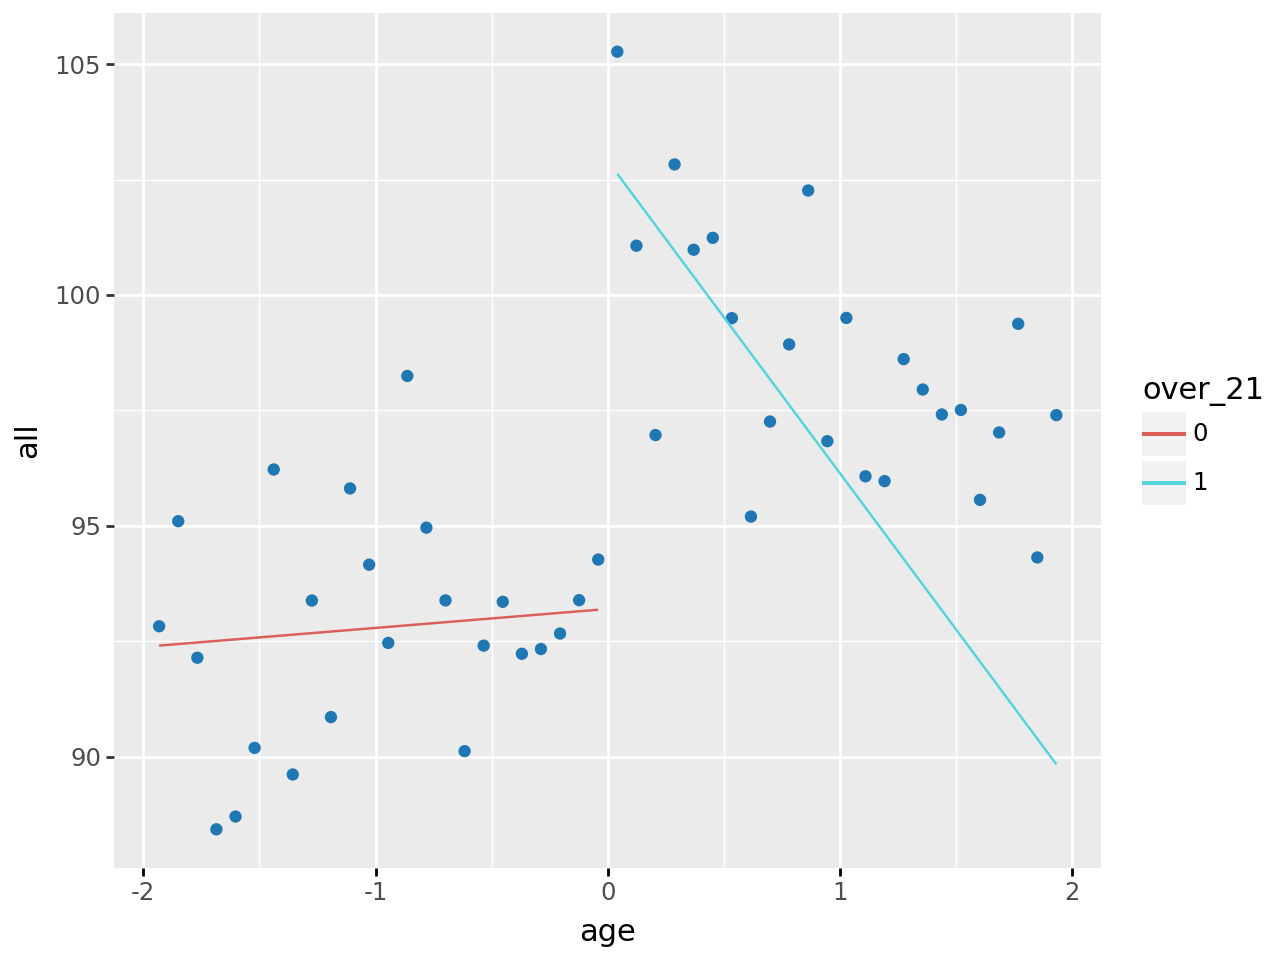

In [17]:
# Cria df com dados ajustados
rdd_df = rdd_df.assign(predictions_all_kernel = model_kernel.fittedvalues,
                        over_21 = rdd_df.over_21.astype(str))

# Criar o gráfico usando plotnine
(ggplot(rdd_df, aes(x = 'age', y = 'all')) +
 geom_point(color='C0') +
 geom_line(aes(x = 'age', y = 'predictions_all_kernel', group = 'over_21', color = 'over_21')) +
 labs())

Na regressão pós-corte, é possível notar uma redução na elasticidade da idade, pois sua inclinação fica mais íngreme negativamente. Resultado da exclusão dos pontos mais à direita. 


Para entender melhor o que a função de kernel faz no nosso ajuste dos dados, eu fiz um calendário de gráfico no geogebra com a forma funcional do triângulo de Kernel já com os parametros ajustados para o nosso problema, que foi uma largua de 1 ano de idade em torno do corte (20 e 22 anos) e o ponto de corte centrado no zero, já que 21 - 21 é zero.

Assim, temos essa visualização.

É facil ver que quanto mais próximo da idade de corte, maior é o peso atribuído ao indivíduo, ilustrando a importancia que buscamos dar para as observações próximas ao ponto de corte.

![Gráfico de Análise](../image/geogebra_triangular_kernel.png)

### Interpretação dos Resultados da Regressão Ponderada (WLS)

#### 1. **Resumo do Modelo**
- **R-squared**: Não informado na saída, mas o modelo ajustado utiliza pesos com o kernel triangular para focar em observações próximas ao ponto de corte.
- **F-statistic**: Não informado diretamente, mas os coeficientes indicam que o modelo é estatisticamente significativo para algumas variáveis.

---

#### 2. **Coeficientes e Interpretação**
| Variável         | Coeficiente | Erro Padrão | t-valor | p-valor | Intervalo de Confiança (95%) | Interpretação |
|------------------|-------------|-------------|---------|---------|-----------------------------|---------------|
| **Intercept**    | 93.2002     | 0.731       | 127.429 | 0.000   | [91.726, 94.674]            | Valor médio de `all` quando `age = 0` e `thereshold = 0`. |
| **age**          | 0.4109      | 1.789       | 0.230   | 0.819   | [-3.196, 4.017]             | O efeito de `age` sozinho não é estatisticamente significativo (p > 0.05). |
| **thereshold**   | 9.7004      | 1.034       | 9.378   | 0.000   | [7.616, 11.785]             | Após o ponto de corte (`thereshold = 1`), há um aumento médio de 9.7004 em `all`. Este efeito é estatisticamente significativo. |
| **age:thereshold** | -7.1759    | 2.531       | -2.835  | 0.007   | [-12.276, -2.076]           | A interação entre `age` e `thereshold` é estatisticamente significativa e sugere que o efeito de `age` sobre `all` diminui após o ponto de corte. |

---

#### 3. **Interpretação dos Resultados**
- **Intercept**: Quando `age = 0` e `thereshold = 0` (antes do ponto de corte), o valor médio de `all` é 93.2002.
- **age**: O coeficiente de `age` (0.4109) sugere que, antes do ponto de corte, cada unidade adicional de idade está associada a um aumento médio de 0.4109 em `all`. No entanto, este efeito não é estatisticamente significativo (p = 0.819).
- **thereshold**: Após o ponto de corte (`thereshold = 1`), há um aumento médio de 9.7004 em `all`, independentemente da idade. Este efeito é estatisticamente significativo (p = 0.000).
- **age:thereshold**: A interação entre `age` e `thereshold` (-7.1759) sugere que o efeito de `age` sobre `all` diminui em 7.1759 unidades após o ponto de corte. Este efeito é estatisticamente significativo (p = 0.007).

---

#### 4. **Por que o coeficiente de interação é significativo e negativo?**
- O coeficiente de interação (`age:thereshold`) é significativo porque há uma mudança clara no efeito de `age` sobre `all` após o ponto de corte.
- O valor negativo indica que, após o ponto de corte, o impacto de `age` sobre `all` diminui. Isso pode refletir uma mudança no comportamento da relação entre idade e a variável dependente devido ao ponto de corte.

---

#### 5. **Outras Observações**
- **Erro padrão elevado para `age` e `age:thereshold`**: Isso pode indicar variabilidade nos dados ou colinearidade entre as variáveis.
- **Significância de `thereshold`**: O coeficiente de `thereshold` é altamente significativo, indicando que o ponto de corte tem um impacto claro na variável dependente.

---

### Conclusão
- O modelo sugere que há um aumento significativo em `all` após o ponto de corte (`thereshold = 1`), mas o efeito de `age` sozinho não é significativo.
- A interação entre `age` e `thereshold` é significativa e negativa, indicando que o impacto de `age` sobre `all` diminui após o ponto de corte.
- Para melhorar o modelo, você pode:
  - Ajustar a largura de banda para incluir mais ou menos observações próximas ao ponto de corte.
  - Explorar outras especificações do modelo ou incluir variáveis adicionais que expliquem melhor a variação em `all`.